<a href="https://colab.research.google.com/github/dowonshun/demo-repo/blob/main/Lin_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow>Learn>TensorFlow Core>Tutorials>tf.Estimator>Linear model

Setup

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
import os

In [ ]:
import sys

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
from IPython.display import clear_output

In [ ]:
from six.moves import urllib

In [ ]:
import tensorflow.compat.v2.feature_column as fc

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving train.csv to train.csv


Load the Titanic dataset

In [ ]:
dftrain = pd.read_csv('train.csv')

dftrain, dfeval, y_train, y_eval are dataframes

In [ ]:
dftrain

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [ ]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.loc[178]

survived                        0
sex                          male
age                          22.0
n_siblings_spouses              0
parch                           0
fare                        7.125
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 178, dtype: object

In [ ]:
dftrain.shape

(627, 10)

In [ ]:
dftrain

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [ ]:
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
dfeval

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [ ]:
dfeval.shape

(264, 10)

Graphics

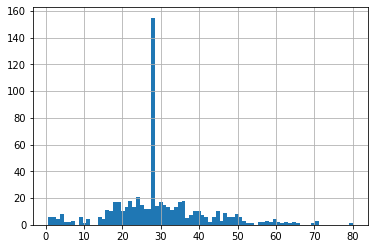

In [ ]:
dftrain.age.hist(bins=80)
plt.show()

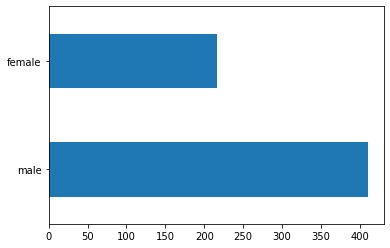

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')


In [ ]:
dftrain.sex.value_counts()

male      410
female    217
Name: sex, dtype: int64

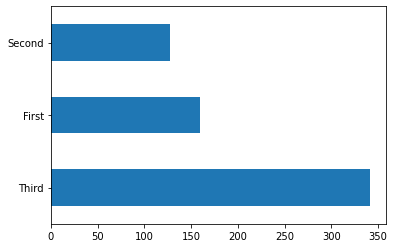

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')
plt.show()

### Feature engineering for the Model

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
vocabulary

array(['n', 'y'], dtype=object)

In [ ]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [ ]:
feature_name

'fare'

In [ ]:
# data 고유값에는 어떤 것이 있는가 확인
dftrain['parch'].unique()

array([0, 1, 2, 5, 3, 4])

In [ ]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

epoch - 전체 데이터 셋에 대하여 forward/backward pass를 거친 횟수




In [ ]:
y_train = dftrain.pop('survived')
y_train
# pop('sex') 하면 dftrain에서 'sex' column 없어짐
# data 분석에 앞서 pop부터 하면 안됨

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

Text(0.5, 0, '% survive')

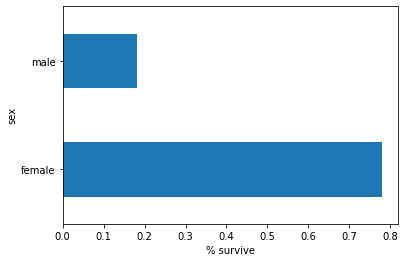

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
dftrain.loc[0], y_train.loc[0]

(sex                          male
 age                          22.0
 n_siblings_spouses              1
 parch                           0
 fare                         7.25
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           n
 Name: 0, dtype: object, 0)

In [ ]:
y_eval = dfeval.pop('survived')
y_eval

0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

Inspect the dataset

In [ ]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('특성 키:', list(feature_batch.keys()))
  print()
  print('클래스 배치:', feature_batch['class'].numpy())
  print()
  print('레이블 배치:', label_batch.numpy())

특성 키: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

클래스 배치: [b'Third' b'Third' b'First' b'Third' b'Third' b'Third' b'Third' b'Third'
 b'Third' b'Third']

레이블 배치: [0 0 1 0 1 0 0 0 0 0]


In [ ]:
# tf.keras.layers.DenseFeatures layer
# dense tensor에 대하여 DenseFeatures layer 사용
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

array([[28.],
       [25.],
       [38.],
       [28.],
       [32.],
       [26.],
       [28.],
       [28.],
       [22.],
       [ 1.]], dtype=float32)

In [ ]:
# categorical column -> indicator column then inpect
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# API for the training the model: tf.estimator
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.83131313, 'auc_precision_recall': 0.7921349, 'average_loss': 0.49235216, 'label/mean': 0.375, 'loss': 0.48676598, 'precision': 0.6513761, 'prediction/mean': 0.44057745, 'recall': 0.7171717, 'global_step': 200}


In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)